In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
THIS RESUKLT should report

In [ ]:
!pip install datasets
!pip install peft
!pip install -U bitsandbytes


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Covid19/7500covid.csv')
# df = df.sample(n=1000, random_state=42)
df.head()

,Unnamed: 0,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,0,1.250000e+18,2020-04-26,"<a href=""http://twitter.com/download/iphone"" r...",RT @DickGossett: TECH TYRANNY: Twitter Suspend...,en,0.0,6799.0,DroletLinnie,NaN,DickGossett,NaN,tech tyranni twitter suspend account youtub re...,-0.3182,0.150,0.850,0.000,neg
1,1,1.270000e+18,2020-06-12,"<a href=""http://twitter.com/download/android"" ...",RT @ChannelNewsAsia: Thai entrepreneur's face ...,en,0.0,0.0,KassimARah,NaN,ChannelNewsAsia,SG,thai entrepreneur face shield protect covid19 ...,-0.2500,0.321,0.446,0.232,neg
2,2,1.270000e+18,2020-06-12,"<a href=""http://twitter.com/download/android"" ...",RT @WilliamQuake1: Erin Marie Olszewski a devo...,en,0.0,16.0,lindac63123953,NaN,WilliamQuake1,NaN,erin mari olszewski devot profession nurs deat...,-0.5994,0.358,0.642,0.000,neg
3,3,1.270000e+18,2020-06-01,"<a href=""http://twitter.com/download/iphone"" r...",RT @BBCWorld: Fears US protests could lead to ...,en,0.0,40.0,AnihKosa,NaN,BBCWorld,NaN,fear protest could lead rise covid19 case,-0.6369,0.510,0.490,0.000,neg
4,4,1.260000e+18,2020-05-12,"<a href=""http://twitter.com/download/iphone"" r...",RT @CP24: CNE cancelled due to COVID-19 pandem...,en,0.0,17.0,ValeriePoirot,NaN,CP24,"Toronto, Ontario, Canada",cne cancel due covid19 pandem,-0.2500,0.333,0.667,0.000,neg


In [ ]:
df_balanced=df

In [ ]:
import pandas as pd


samples_per_label = 2500

df_balanced = (
    df.groupby('sentiment', group_keys=False)
      .apply(lambda x: x.sample(n=samples_per_label, random_state=42))
      .reset_index(drop=True)
)

# Check result
print(df_balanced['sentiment'].value_counts())


sentiment
neg    2500
neu    2500
pos    2500
Name: count, dtype: int64


<ipython-input-2-7b07f26b2e80>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=samples_per_label, random_state=42))


In [ ]:
# Remove rows where 'sentiment' is NaN
df_balanced = df_balanced.dropna(subset=['sentiment'])


In [ ]:
df_balanced.to_csv('/content/drive/MyDrive/Covid19/7500covid.csv')

In [ ]:
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
import nltk
import re
import string
import pandas as pd
import numpy as np
from wordcloud import WordCloud
string.punctuation

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt_tab')
# Initialize stop words, English words corpus, and stemmer
stop_words = set(stopwords.words('english'))
english_words = set(words.words())
# stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()

    text = re.sub(r"^rt\s+", "", text)

    text = re.sub(r"@\w+", "", text)

    text = re.sub(r"#(\w+)", r"\1", text)

    text = re.sub(r"http\S+|www\S+", "", text)

    text = text.translate(str.maketrans("", "", string.punctuation))

    text = ''.join([i for i in text if not i.isdigit()])

    tokens = word_tokenize(text)


    return ' '.join(tokens)

df_balanced['Cleantext'] = df_balanced['original_text'].apply(preprocess)


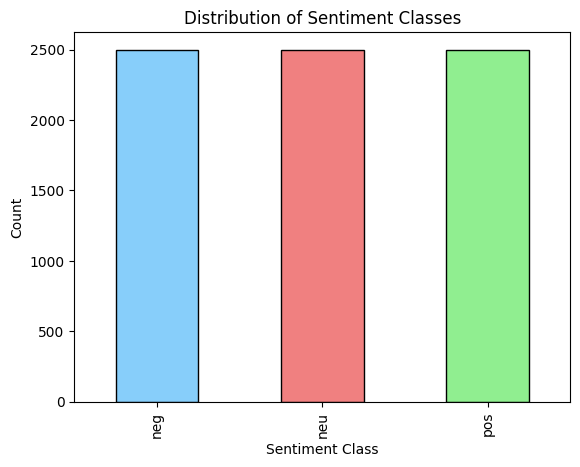

In [ ]:
import matplotlib.pyplot as plt

# Count sentiment classes
sentiment_counts = df_balanced["sentiment"].value_counts()

# Define colors for "blue light," "red light," and "green light"
colors = ["lightskyblue", "lightcoral", "lightgreen"]  # Light blue, light red, light green

# Plot
sentiment_counts.plot(kind="bar", color=colors, edgecolor="black")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Classes")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import torch
import os
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
import seaborn as sns
import matplotlib as plt
from transformers import AutoModel, BertTokenizerFast
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [ ]:
X=df_balanced.Cleantext
Y=df_balanced.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Further split temp into test and validation
print(f'(X_train: {len(X_train)}\nx_test: {len(X_test)})')

(X_train: 6000
x_test: 1500)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(y_train)

# Transform both training and test labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
import numpy as np
import pandas as pd
import torch
import os
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
import seaborn as sns
import matplotlib as plt
from transformers import AutoModel, BertTokenizerFast
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
from transformers import AutoTokenizer, AutoModel

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = "bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)
model.eval()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_embeddings(texts):
    all_embeddings = []

    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
            # Mean pooling of token embeddings
            embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
        all_embeddings.append(embedding)

    return all_embeddings


In [ ]:
import time


In [ ]:
start_time = time.time()
X_train = get_embeddings(X_train)
X_test = get_embeddings(X_test)
end_time = time.time()
print(f"Embedding  took {end_time - start_time:.2f} seconds.")

Embedding  took 125.86 seconds.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC
import time

start_time = time.time()

svc = SVC(kernel='rbf', C=0.1, gamma='scale', probability=True)
svc.fit(X_train_scaled, y_train)

end_time = time.time()
print(f"SVC Training took {end_time - start_time:.2f} seconds.")


SVC Training took 71.31 seconds.


In [ ]:
from sklearn.metrics import classification_report

y_pred = svc.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

         neg       0.63      0.65      0.64       527
         neu       0.52      0.56      0.54       492
         pos       0.60      0.53      0.57       481

    accuracy                           0.58      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.58      0.58      0.58      1500



In [ ]:
from sklearn.metrics import classification_report

train_preds_S = svc.predict(X_train_scaled)

print(classification_report(y_train, train_preds_S))


              precision    recall  f1-score   support

         neg       0.65      0.71      0.68      1973
         neu       0.61      0.63      0.62      2008
         pos       0.66      0.57      0.61      2019

    accuracy                           0.64      6000
   macro avg       0.64      0.64      0.64      6000
weighted avg       0.64      0.64      0.63      6000



In [ ]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()

lgb = LogisticRegression(C=0.001, max_iter=1000)
lgb.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"LogisticRegression Trainning took {end_time - start_time:.2f} seconds.")

LogisticRegression Trainning took 0.48 seconds.


In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

y_pred = lgb.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

         neg       0.67      0.68      0.68       527
         neu       0.59      0.61      0.60       492
         pos       0.62      0.59      0.61       481

    accuracy                           0.63      1500
   macro avg       0.63      0.63      0.63      1500
weighted avg       0.63      0.63      0.63      1500



In [ ]:
# Predict on training data
train_preds = lgb.predict(X_train_scaled)

# Report using string labels
print("Classification Report (Training Data):")
print(classification_report(y_train, train_preds))


Classification Report (Training Data):
              precision    recall  f1-score   support

         neg       0.70      0.75      0.73      1973
         neu       0.68      0.66      0.67      2008
         pos       0.68      0.64      0.66      2019

    accuracy                           0.69      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.69      0.69      0.69      6000



In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import classification_report

# Load the zero-shot classification pipeline with a model fine-tuned for NLI (BART)
classifier = pipeline("zero-shot-classification", model="bert-base-uncased")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [ ]:
from sklearn.metrics import classification_report
candidate_labels = ["positive", "neutral", "negative"]

sentiment_mapping = {
    'pos': 'positive',
    'neg': 'negative',
    'neu': 'neutral'
}

y_test = y_test.map(sentiment_mapping)

predictions = []

for text in X_test:
    result = classifier(text, candidate_labels)
    predicted_label = result["labels"][0]
    predictions.append(predicted_label)


print(classification_report(y_test, predictions, target_names=candidate_labels))


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


              precision    recall  f1-score   support

    positive       0.27      0.19      0.22       527
     neutral       0.32      0.61      0.42       492
    negative       0.25      0.11      0.15       481

    accuracy                           0.30      1500
   macro avg       0.28      0.30      0.26      1500
weighted avg       0.28      0.30      0.26      1500

